<a href="https://colab.research.google.com/github/svobodn1y/PP_Matrix/blob/main/Matrix_Multiplication_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Алгоритм Штрассена



Наивный алгоритм $O(n^{3})$

Алгоритм Штрассена $O(n^{2.81})$

Алгоритм Винограда — Штрассена $O(n^{2.81})$

Алгоритм Копперсмита - Винограда $O(n^{2.3727})$



## Пример реализации алгоритма Штрассена


In [ ]:
from itertools import product
import numpy as np

def split_to_2x2_blocks(matrix):
	return list(map(
		lambda row: np.hsplit(row, 2),
		np.vsplit(matrix, 2)
	))

def strassen_mul_2x2(lb, rb):
	d = strassen_mul(lb[0][0] + lb[1][1], rb[0][0] + rb[1][1])
	d_1 = strassen_mul(lb[0][1] - lb[1][1], rb[1][0] + rb[1][1])
	d_2 = strassen_mul(lb[1][0] - lb[0][0], rb[0][0] + rb[0][1])

	left = strassen_mul(lb[1][1], rb[1][0] - rb[0][0])
	right = strassen_mul(lb[0][0], rb[0][1] - rb[1][1])
	top = strassen_mul(lb[0][0] + lb[0][1], rb[1][1])
	bottom = strassen_mul(lb[1][0] + lb[1][1], rb[0][0])

	return [[d + d_1 + left - top, right + top],
			[left + bottom, d + d_2 + right - bottom]]

def trivial_mul(left, right):
	height, mid_size = left.shape
	mid_size, width = right.shape

	result = np.zeros((height, width))
	for row, col, mid in product(*map(range, [height, width, mid_size])):
		result[row][col] += left[row][mid] * right[mid][col]

	return result

TRIVIAL_MULTIPLICATION_BOUND = 8

def strassen_mul(left, right):
  assert(left.shape == right.shape)
  assert(left.shape[0] == left.shape[1])


  if left.shape[0] <= TRIVIAL_MULTIPLICATION_BOUND:
    return trivial_mul(left, right)

  assert(left.shape[0] % 2 == 0)
  return np.block(
		strassen_mul_2x2(*map(split_to_2x2_blocks, [left, right]))
	)

left = np.array([[1,2,3,4,5,6,7,8,9,10],
                [1,2,3,4,5,6,7,8,9,10],
                 [1,2,3,4,5,6,7,8,9,10],
                  [1,2,3,4,5,6,7,8,9,10],
                   [1,2,3,4,5,6,7,8,9,10],
                    [1,2,3,4,5,6,7,8,9,10],
                     [1,2,3,4,5,6,7,8,9,10],
                      [1,2,3,4,5,6,7,8,9,10],
                       [1,2,3,4,5,6,7,8,9,10],
                        [1,2,3,4,5,6,7,8,9,10]])

right = np.array([[11,12,13,14,15,16,17,18,19,20],
                  [11,12,13,14,15,16,17,18,19,20],
                  [11,12,13,14,15,16,17,18,19,20],
                  [11,12,13,14,15,16,17,18,19,20],
                  [11,12,13,14,15,16,17,18,19,20],
                  [11,12,13,14,15,16,17,18,19,20],
                  [11,12,13,14,15,16,17,18,19,20],
                  [11,12,13,14,15,16,17,18,19,20],
                  [11,12,13,14,15,16,17,18,19,20],
                  [11,12,13,14,15,16,17,18,19,20]])

strassen_mul(left, right)

## Ссылки

https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%A8%D1%82%D1%80%D0%B0%D1%81%D1%81%D0%B5%D0%BD%D0%B0

https://www.youtube.com/watch?v=Wfuk6JszDuA

# Approximating matrix multiplication and low-rank approximation


In [ ]:
import numpy as np
import random
import math

np.random.seed(0)
random.seed(0)

In [ ]:
m = 120
n = 69
p = 40

A = np.random.rand(m,n) * 10

B = np.random.rand(n,p) * 10


In [ ]:
print(A)
print(B)

In [ ]:
c = 69

C = np.zeros((m,c))
R = np.zeros((c,p))

for t in range(c):
  i_t = random.randint(1,n) - 1

  random_array = np.random.rand(n)
  p_i = random_array / np.sum(random_array)

  C[:, t] = A[:, i_t] / math.sqrt(c * random.choice(p_i))
  R[t] = B[i_t] / math.sqrt(c * random.choice(p_i))


In [ ]:
print(C)
print(R)

In [ ]:
AB = np.dot(A,B)

In [ ]:
CR = np.dot(C,R)

In [ ]:
E = (np.linalg.norm(AB - CR))**2
E

5675473291.210613

##Ссылки

https://cs.stanford.edu/people/mmahoney/cs369m/Lectures/lecture3.pdf

#PCA


In [ ]:
import numpy as np

def pca(X, num_components):
    # Шаг 1: Центрируем данные
    X_centered = X - np.mean(X, axis=0)

    # Шаг 2: Вычисляем ковариационную матрицу
    covariance_matrix = np.cov(X_centered, rowvar=False)

    # Шаг 3: Находим собственные векторы и собственные значения ковариационной матрицы
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Шаг 4: Сортируем собственные значения и векторы по убыванию собственных значений
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Шаг 5: Выбираем первые num_components собственных векторов
    selected_eigenvectors = sorted_eigenvectors[:, :num_components]

    # Шаг 6: Преобразуем данные
    X_reduced = np.dot(X_centered, selected_eigenvectors)

    return X_reduced, sorted_eigenvalues[:num_components]

# Пример использования
# Создадим случайный набор данных
np.random.seed(0)
X = np.random.rand(100, 5)  # 100 образцов, 5 признаков
print(X)
# Применим PCA для сокращения размерности до 2 компонент
X_reduced, eigenvalues = pca(X, 2)

print("Преобразованные данные:\n", X_reduced)
print("Собственные значения:\n", eigenvalues)


[[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
 [0.64589411 0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606]
 [0.0871293  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443]
 [0.63992102 0.14335329 0.94466892 0.52184832 0.41466194]
 [0.26455561 0.77423369 0.45615033 0.56843395 0.0187898 ]
 [0.6176355  0.61209572 0.616934   0.94374808 0.6818203 ]
 [0.3595079  0.43703195 0.6976312  0.06022547 0.66676672]
 [0.67063787 0.21038256 0.1289263  0.31542835 0.36371077]
 [0.57019677 0.43860151 0.98837384 0.10204481 0.20887676]
 [0.16130952 0.65310833 0.2532916  0.46631077 0.24442559]
 [0.15896958 0.11037514 0.65632959 0.13818295 0.19658236]
 [0.36872517 0.82099323 0.09710128 0.83794491 0.09609841]
 [0.97645947 0.4686512  0.97676109 0.60484552 0.73926358]
 [0.03918779 0.28280696 0.12019656 0.2961402  0.11872772]
 [0.31798318 0.41426299 0.0641475  0.69247212 0.56660145]
 [0.26538949 0

#SVD


##MAIN

In [ ]:
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt

###A_approximation

In [ ]:
m, k, n = 10000, 1000, 10000

A = np.random.uniform(0, 100, size=(m, k))

In [ ]:
U_full, Sigma_full, Vt_full = svd(A, full_matrices=False)

In [ ]:
Sigma_full[:20]

array([158099.41024323,   3782.41414669,   3778.29842635,   3765.77040753,
         3765.0934122 ,   3759.8129328 ,   3754.34065025,   3746.65364777,
         3744.78465681,   3740.40645633,   3733.84108889,   3730.12712195,
         3725.15905374,   3723.19008099,   3718.36871577,   3715.45633452,
         3713.75260969,   3700.3733224 ,   3696.06551395,   3693.40285248])

In [ ]:
Sigma_full.shape

(1000,)

In [ ]:
Sigma_full[980:]

array([2057.82774375, 2055.69621634, 2053.4251073 , 2048.62301537,
       2046.02145387, 2042.17301385, 2038.25808208, 2034.50165755,
       2030.89341542, 2028.02443101, 2024.73835746, 2020.91596935,
       2017.38063406, 2016.77011933, 2011.96797022, 2000.87699921,
       1995.02290873, 1994.352088  , 1986.89888407, 1979.95185032])

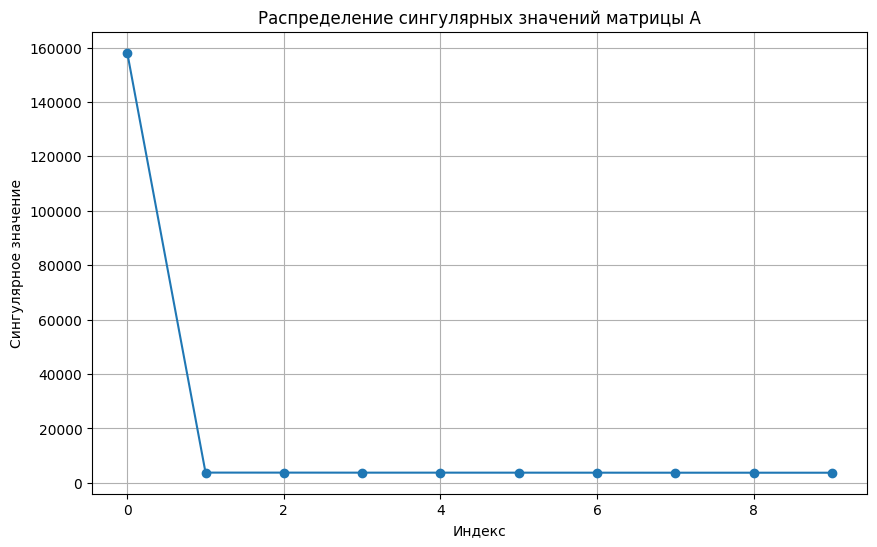

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Sigma_full[:10], marker='o')
plt.title("Распределение сингулярных значений матрицы A")
plt.xlabel("Индекс")
plt.ylabel("Сингулярное значение")
plt.grid(True)
plt.show()

In [ ]:
print(f"Отношение первого сингулярного значения к сумме всех: {Sigma_full[0] / Sigma_full.sum():.4f}")

Отношение первого сингулярного значения к сумме всех: 0.0526


In [ ]:
r = 1000

In [ ]:
U_r = U_full[:, :r]
Sigma_r = np.diag(Sigma_full[:r])
V_r = Vt_full[:r, :]

In [ ]:
approx_result_for_A = U_r @ (Sigma_r @ V_r)

In [ ]:
absolute_error_for_A = np.linalg.norm(A - approx_result_for_A)
print(f"Абсолютная ошибка нахождения А при взятии первых {r} сингулярных значений: {absolute_error_for_A:.4f}")

# Сравнение точности
error_for_A = np.linalg.norm(A - approx_result_for_A) / np.linalg.norm(A)
print(f"Средняя ошибка приближенного нахождения А при взятии первых {r} сингулярных значений: {error_for_A}")

Абсолютная ошибка нахождения А при взятии первых 1000 сингулярных значений: 0.0000
Средняя ошибка приближенного нахождения А при взятии первых 1000 сингулярных значений: 2.6311902565749762e-15


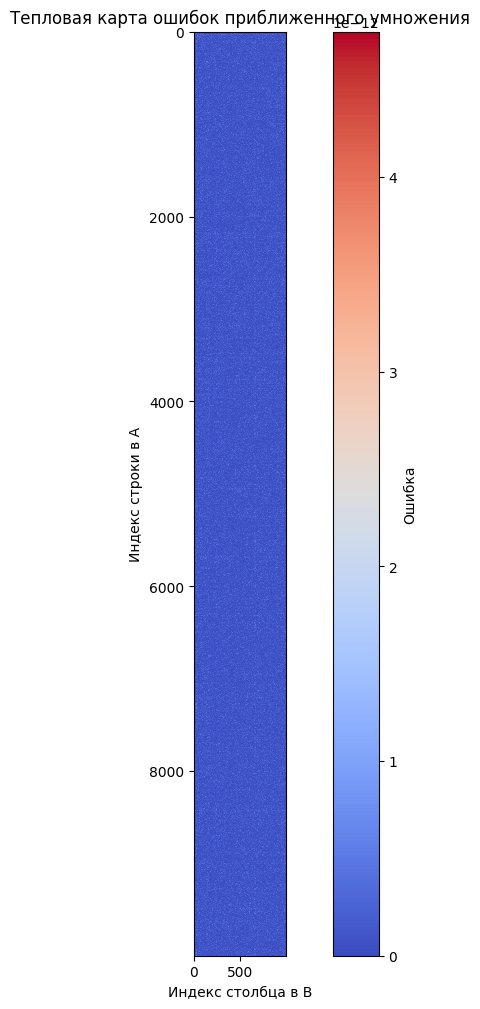

In [ ]:
errors = np.abs(A - approx_result_for_A)
plt.figure(figsize=(12, 12))
plt.imshow(errors, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label="Ошибка")
plt.title("Тепловая карта ошибок приближенного умножения")
plt.xlabel("Индекс столбца в B")
plt.ylabel("Индекс строки в A")
plt.show()

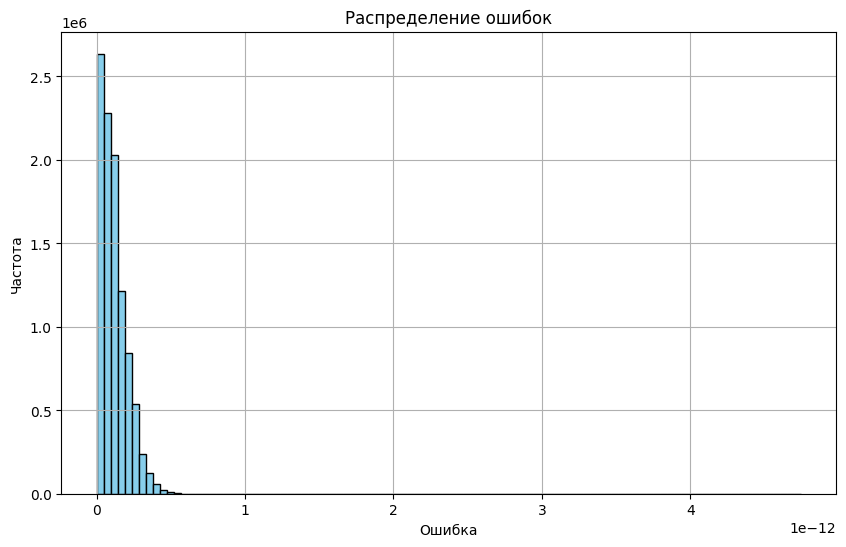

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(errors.flatten(), bins=100, color='skyblue', edgecolor='black')
plt.title("Распределение ошибок")
plt.xlabel("Ошибка")
plt.ylabel("Частота")
plt.grid(True)
plt.show()

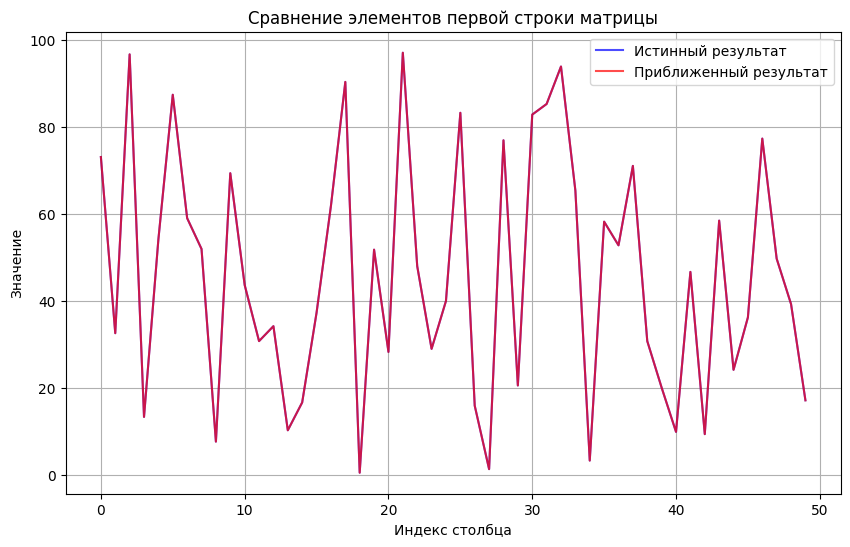

In [ ]:
# 3. Сравнение элементов приближенного и истинного результата (первый фрагмент)
plt.figure(figsize=(10, 6))
plt.plot(A[0, :50], label="Истинный результат", color='blue', alpha=0.7)
plt.plot(approx_result_for_A[0, :50], label="Приближенный результат", color='red', alpha=0.7)
plt.legend()
plt.title("Сравнение элементов первой строки матрицы")
plt.xlabel("Индекс столбца")
plt.ylabel("Значение")
plt.grid(True)
plt.show()

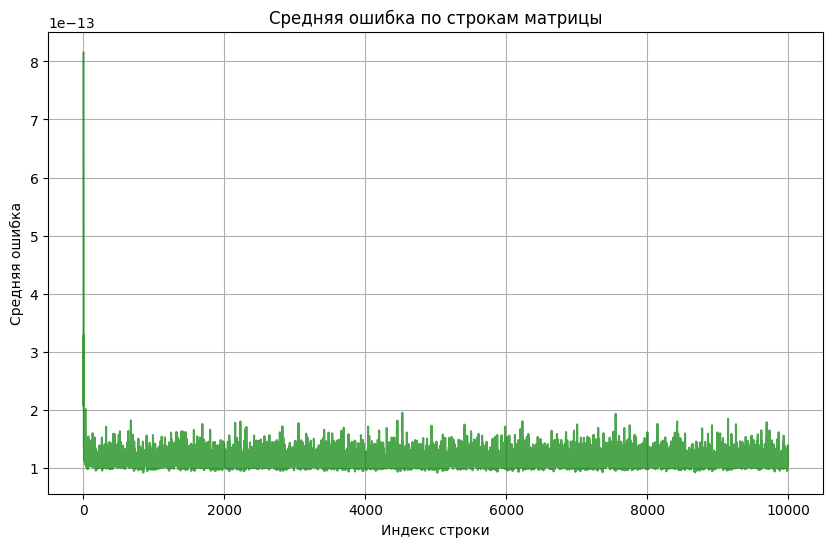

In [ ]:
# 4. Сравнение ошибок по строкам
plt.figure(figsize=(10, 6))
plt.plot(np.mean(errors, axis=1), label="Средняя ошибка по строкам", color='green', alpha=0.7)
plt.title("Средняя ошибка по строкам матрицы")
plt.xlabel("Индекс строки")
plt.ylabel("Средняя ошибка")
plt.grid(True)
plt.show()

In [ ]:
# Норма Фробениуса
frobenius_norm = np.linalg.norm(A - approx_result_for_A, 'fro')
print(f"Норма Фробениуса: {frobenius_norm}")

# Максимальная норма
max_norm = np.max(np.abs(A - approx_result_for_A))
print(f"Максимальная норма: {max_norm}")

# Средняя абсолютная ошибка (MAE)
mae = np.mean(np.abs(A - approx_result_for_A))
print(f"Средняя абсолютная ошибка (MAE): {mae}")

# Среднеквадратическая ошибка (MSE)
mse = np.mean((A - approx_result_for_A) ** 2)
print(f"Среднеквадратическая ошибка (MSE): {mse}")

# Косинусное сходство
cosine_similarity = np.sum(A * approx_result_for_A) / (np.linalg.norm(A) * np.linalg.norm(approx_result_for_A))
print(f"Косинусное сходство: {cosine_similarity}")

# Норма Шаттена (p=1)
u, s, vt = np.linalg.svd(A - approx_result_for_A, full_matrices=False)
schatten_norm = np.sum(s)
print(f"Норма Шаттена (p=1): {schatten_norm}")

# Корреляция между матрицами
correlation = np.corrcoef(A.flatten(), approx_result_for_A.flatten())[0, 1]
print(f"Корреляция между матрицами: {correlation}")

# Спектральная норма
spectral_norm = np.linalg.norm(A - approx_result_for_A, 2)
print(f"Спектральная норма: {spectral_norm}")

# 90-й перцентиль ошибок
percentile_90 = np.percentile(np.abs(A - approx_result_for_A), 90)
print(f"90-й перцентиль ошибок: {percentile_90}")


Норма Фробениуса: 4.802517867230441e-10
Максимальная норма: 4.746425474877469e-12
Средняя абсолютная ошибка (MAE): 1.1530402596517803e-13
Среднеквадратическая ошибка (MSE): 2.3064177865067622e-26
Косинусное сходство: 0.9999999999999987
Норма Шаттена (p=1): 1.1343789392061906e-08
Корреляция между матрицами: 1.0
Спектральная норма: 1.8454278066136755e-10
90-й перцентиль ошибок: 2.362554596402333e-13


###A*B_approximation

In [ ]:
m, k, n = 10000, 1000, 10000

A = np.random.uniform(0, 100, size=(m, k))
B = np.random.uniform(0, 100, size=(k, n))

true_result = np.dot(A, B)

In [ ]:
U_A_full, Sigma_A_full, Vt_A_full = svd(A, full_matrices=False)

U_B_full, Sigma_B_full, Vt_B_full = svd(B, full_matrices=False)

In [ ]:
print(Sigma_A_full[:20])
print(Sigma_B_full[:20])

[158118.36501305   3792.45517017   3780.60157081   3775.99830772
   3771.80489      3766.98121784   3759.64685922   3751.82518943
   3750.38571012   3740.26709493   3738.84113701   3736.48953907
   3732.57092628   3729.04147177   3727.40122777   3718.45214687
   3715.43831389   3708.55917442   3706.96672081   3702.57600978]
[158152.11630771   3785.24744437   3779.76049739   3776.69246704
   3772.06119003   3769.31847306   3764.47416514   3755.73808292
   3754.61424151   3747.32381634   3743.27460212   3732.91011171
   3726.36132495   3721.95846693   3719.6321856    3718.54108902
   3713.88915387   3707.75173358   3703.81159632   3702.55809656]


In [ ]:
print(Sigma_A_full.shape)
print(Sigma_B_full.shape)

(1000,)
(1000,)


In [ ]:
r_A = 1000
r_B = 1000

In [ ]:
U_A_r = U_A_full[:, :r_A]
Sigma_A_r = np.diag(Sigma_A_full[:r_A])
V_A_r = Vt_A_full[:r_A, :]

U_B_r = U_B_full[:, :r_B]
Sigma_B_r = np.diag(Sigma_B_full[:r_B])
V_B_r = Vt_B_full[:r_B, :]

In [ ]:
approx_result = U_A_r @ (Sigma_A_r @ (V_A_r @ (U_B_r @ (Sigma_B_r @ V_B_r))))

In [ ]:
absolute_error = np.linalg.norm(true_result - approx_result)
print(f"Абсолютная ошибка при взятии первых {r_A}, {r_B} сингулярных значений: {absolute_error:.4f}")

error_for_A = np.linalg.norm(true_result - approx_result) / np.linalg.norm(true_result)
print(f"Средняя ошибка приближенного умножения при взятии первых {r} сингулярных значений: {error_for_A}")

Абсолютная ошибка при взятии первых 1000, 1000 сингулярных значений: 0.0001
Средняя ошибка приближенного умножения при взятии первых 1000 сингулярных значений: 4.023654664073236e-15


In [ ]:
# Норма Фробениуса
frobenius_norm = np.linalg.norm(true_result - approx_result, 'fro')
print(f"Норма Фробениуса: {frobenius_norm}")

# Максимальная норма
max_norm = np.max(np.abs(true_result - approx_result))
print(f"Максимальная норма: {max_norm}")

# Средняя абсолютная ошибка (MAE)
mae = np.mean(np.abs(true_result - approx_result))
print(f"Средняя абсолютная ошибка (MAE): {mae}")

# Среднеквадратическая ошибка (MSE)
mse = np.mean((true_result - approx_result) ** 2)
print(f"Среднеквадратическая ошибка (MSE): {mse}")

# Косинусное сходство
cosine_similarity = np.sum(true_result * approx_result) / (np.linalg.norm(true_result) * np.linalg.norm(approx_result))
print(f"Косинусное сходство: {cosine_similarity}")

# Корреляция между матрицами
correlation = np.corrcoef(true_result.flatten(), approx_result.flatten())[0, 1]
print(f"Корреляция между матрицами: {correlation}")

# Спектральная норма
spectral_norm = np.linalg.norm(true_result - approx_result, 2)
print(f"Спектральная норма: {spectral_norm}")

# 90-й перцентиль ошибок
percentile_90 = np.percentile(np.abs(true_result - approx_result), 90)
print(f"90-й перцентиль ошибок: {percentile_90}")


Норма Фробениуса: 0.00010062086455682939
Максимальная норма: 9.406358003616333e-08
Средняя абсолютная ошибка (MAE): 8.02995681297034e-09
Среднеквадратическая ошибка (MSE): 1.0124558384163804e-16
Косинусное сходство: 0.9999999999999728


###Tests

In [ ]:
A = np.array([[1, -1, 3],[3, 1, 1]])
B = np.array([[1,2,3],[4,5,6],[7,8,9]])

true_result = np.dot(A, B)

r = 1  # Значение r уменьшено до слишком малого числа для плохой аппроксимации
U_full, Sigma_full, Vt_full = svd(A, full_matrices=False)

print(U_full)
print(Sigma_full)
print(Vt_full)
print("_____________")

# Приближённое разложение для A
U_r = U_full[:, :r]  # Только первые r столбцов
Sigma_r = np.diag(Sigma_full[:r])  # Диагональная матрица с первыми r сингулярными значениями
V_r = Vt_full[:r, :]  # Только первые r строк
print("_____________")
print(U_r)
print(Sigma_r)
print(V_r)
print("_____________")
approx_result = np.dot(U_r, np.dot(Sigma_r, np.dot(V_r, B)))
error = np.linalg.norm(true_result - approx_result) / np.linalg.norm(true_result)
print(approx_result)
print(true_result)
print(error)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[4.         2.44948974]
[[-7.07106781e-01  1.20868191e-16 -7.07106781e-01]
 [ 5.77350269e-01  5.77350269e-01 -5.77350269e-01]]
_____________
_____________
[[-0.70710678]
 [-0.70710678]]
[[4.]]
[[-7.07106781e-01  1.20868191e-16 -7.07106781e-01]]
_____________
[[16. 20. 24.]
 [16. 20. 24.]]
[[18 21 24]
 [14 19 24]]
0.06357701775596343
